In [2]:
import cv2

from pathlib import Path

import matplotlib.pyplot as plt

from src.utils.image_preprocessing import image_processing
from src.utils.line_digitilizer import digitilize_single_line

(26634, 1647, 3)


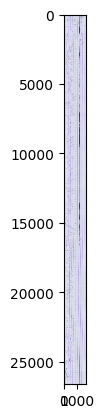

In [4]:
img_full = cv2.imread(str(Path('data/well_4_old.jpg')))
print(img_full.shape)
plt.imshow(img_full)

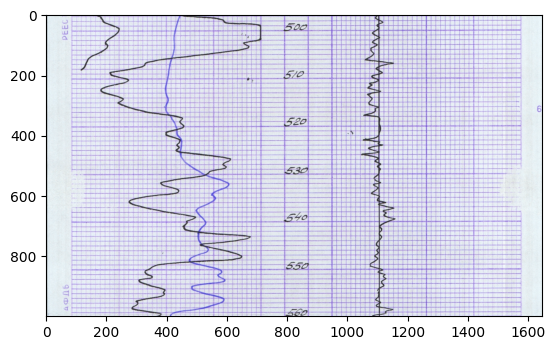

In [5]:
img_crop = img_full[4000:5000, :, :]
plt.imshow(img_crop)

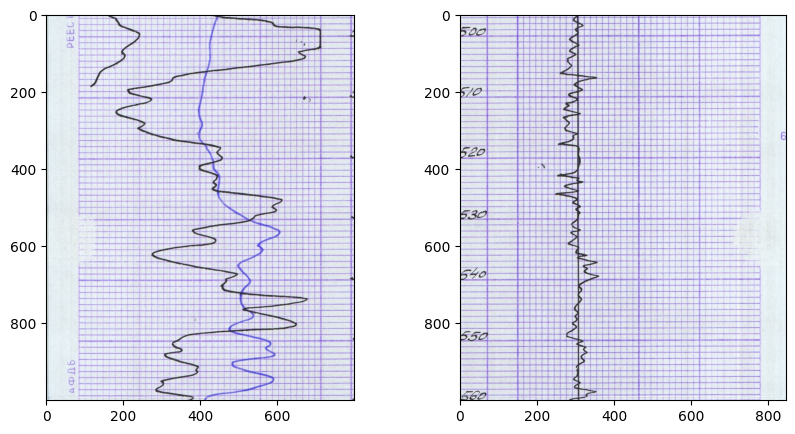

In [6]:
two_plots = img_crop[:, 0:800, :]
single_plot = img_crop[:, 800:, :]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(two_plots)
axs[1].imshow(single_plot)

# Test single processer

(1000, 847, 3)


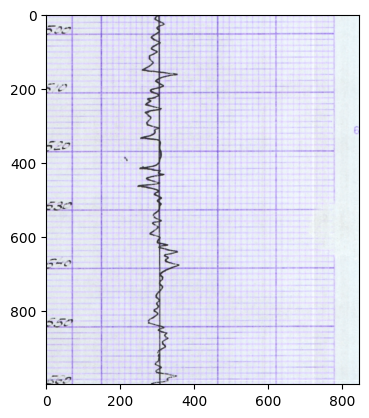

In [10]:
print(single_plot.shape)
filtered_img1 = image_processing(single_plot, kernel_size=6)
plt.imshow(filtered_img1)

crop image

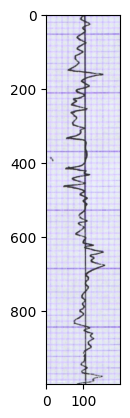

In [13]:
bbox=(200, 0, 400, 999)

filtered_img1_cropped = filtered_img1[bbox[1]:bbox[3], bbox[0]:bbox[2]]
plt.imshow(filtered_img1_cropped)

In [14]:
x, y = digitilize_single_line(
    filtered_img1_cropped, bbox=(200, 0, 400, 999),
    depthK=1, depthB=0, mnemonicK=1, mnemonicB=0
)

Line detection: 100%|██████████| 999/999 [00:00<00:00, 1129.05it/s]


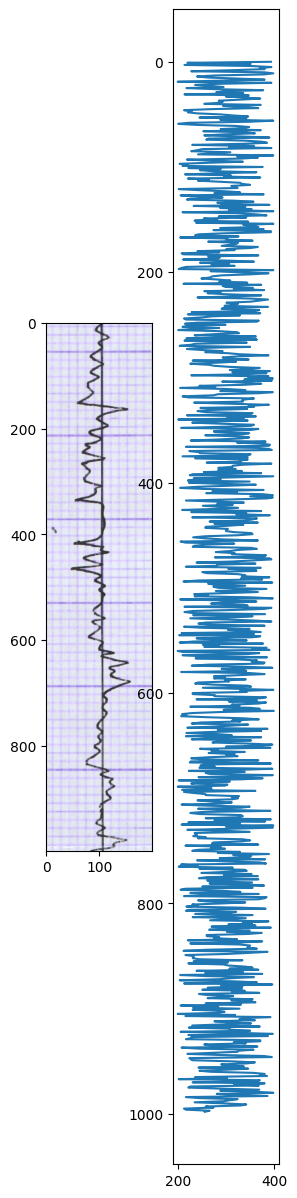

In [15]:
fig, axs = plt.subplots(1,2, figsize=(3, 15))
axs[0].imshow(filtered_img1_cropped)
axs[1].invert_yaxis()
axs[1].plot(x, y)